# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


In [1]:
import os
#import re
#!pip install emoji
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
import nltk
nltk.download('stopwords')
#from nltk.corpus import stopwords
from string import punctuation

stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/halledavis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Add any additional import statements you need here

import os
import regex as re
import glob

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/halledavis/Desktop"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :    
    counter = Counter()
    tokens.map(counter.update)
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    
    counter_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    
    num_tokens = sum(freq_df['freq'])
    num_unique_tokens = freq_df.shape[0]
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum((counter_df['index'].str.len()) * counter_df[0])
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The top 5 most common words are")
        print(counter.most_common(5))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
textdata = ["This is a dataframe", "We like dataframes", "You like dataframes", "We all scream for dataframes"]
textdf = pd.DataFrame(textdata, columns=['text'])
textdf

,text
0,This is a dataframe
1,We like dataframes
2,You like dataframes
3,We all scream for dataframes


In [6]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [7]:
pipeline = [str.lower, tokenize]
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [8]:
textdf['tokens'] = textdf['text'].apply(prepare, pipeline=pipeline)

In [9]:
#text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(textdf["tokens"], verbose=True)[0] == 15)
assert(descriptive_stats(textdf["tokens"], verbose=False)[1] == 11)
#assert(descriptive_stats(textdf["tokens"], verbose=False)[2] == 0.733) # resulting in error, even though I can see it matches
assert(descriptive_stats(textdf["tokens"], verbose=False)[3] == 73)


# I switched the QC statements to my text df rather than the provided line of text, because my ultimate
# code will be used on a df with many rows, not just a single line of text

There are 15 tokens in the data.
There are 11 unique tokens in the data.
There are 73 characters in the data.
The lexical diversity is 0.733 in the data.
The top 5 most common words are
[('dataframes', 3), ('we', 2), ('like', 2), ('this', 1), ('is', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertions are helpful for QC purposes. Instead of me manually checking to make sure my output is what is expected, the assertion statement will do it automatically.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [10]:
# Read in the lyrics data

path = "/Users/halledavis/Desktop/lyrics/"
os.chdir(path)

file_list = glob.glob(os.path.join(os.getcwd(), "lilwayne", "*.txt"))

lilwaynelyrics = []

for file_path in file_list:
    with open(file_path) as f_input:
        lyrics = (f_input.read())
        file_name = file_path.split("/")[-1]
        lilwaynelyrics.append(
            {
                'Artist': "Lil Wayne",
                'Song': file_name,
                'Lyrics': lyrics
            }
        )
        
lilwaynelyrics = pd.DataFrame(lilwaynelyrics)

In [11]:
file_list = glob.glob(os.path.join(os.getcwd(), "lildicky", "*.txt"))

lildickylyrics = []

for file_path in file_list:
    with open(file_path) as f_input:
        lyrics = (f_input.read())
        file_name = file_path.split("/")[-1]
        lildickylyrics.append(
            {
                'Artist': "Lil Dicky",
                'Song': file_name,
                'Lyrics': lyrics
            }
        )
        
lildickylyrics = pd.DataFrame(lildickylyrics)

In [12]:
lyrics = [lilwaynelyrics, lildickylyrics]

lyricsdf = pd.concat(lyrics)

In [13]:
# Read in the twitter data

path = "/Users/halledavis/Desktop/twitter/"
os.chdir(path)
twitter_files = os.listdir("/Users/halledavis/Desktop/twitter/")
desc_files = [f for f in twitter_files if "followers_data" in f]
twitter_data = defaultdict(list)
for f in desc_files :
    artist = f.split("_")[0]
        
    with open(path + f,'r', encoding='utf8') as infile :
        next(infile)
        for idx, line in enumerate(infile.readlines()) :
            line = line.strip().split("\t")
            if len(line) == 7 :
                twitter_data[artist].append(line[6])

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [15]:
punctuation = set(punctuation) # speeds up comparison

In [16]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [17]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [18]:
## Code to customize stopwords, if I think that's necessary

#include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
#exclude_stopwords = {'against'}
#stopwords |= include_stopwords
#stopwords -= exclude_stopwords

In [19]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [20]:
# create your clean twitter data here

twitterdf = pd.DataFrame([(k, x) for k, v in twitter_data.items() for x in v], columns=['artist','tweet'])
twitterdf['tokens'] = twitterdf['tweet'].apply(prepare, pipeline=pipeline)
chertweets = twitterdf[twitterdf["artist"] == "cher"]
robyntweets = twitterdf[twitterdf["artist"] != "cher"]

In [21]:
# create your clean lyrics data here

lyricsdf['tokens'] = lyricsdf['Lyrics'].apply(prepare, pipeline=pipeline)
lilwaynelyrics['tokens'] = lilwaynelyrics['Lyrics'].apply(prepare, pipeline=pipeline)
lildickylyrics['tokens'] = lildickylyrics['Lyrics'].apply(prepare, pipeline=pipeline)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [22]:
# calls to descriptive_stats here
print("Lil Wayne Stats")
descriptive_stats(lilwaynelyrics["tokens"])
print("\n Lil Dicky Stats")
descriptive_stats(lildickylyrics["tokens"])
print("\n Cher Stats")
descriptive_stats(chertweets["tokens"])
print("\n Robyn Stats")
descriptive_stats(robyntweets["tokens"])


Lil Wayne Stats
There are 8477 tokens in the data.
There are 1929 unique tokens in the data.
There are 40077 characters in the data.
The lexical diversity is 0.228 in the data.
The top 5 most common words are
[('nigga', 261), ('like', 149), ('hot', 138), ('get', 113), ('block', 106)]

 Lil Dicky Stats
There are 7487 tokens in the data.
There are 2598 unique tokens in the data.
There are 37178 characters in the data.
The lexical diversity is 0.347 in the data.
The top 5 most common words are
[('like', 166), ('dicky', 92), ('shit', 90), ('get', 76), ('know', 71)]

 Cher Stats
There are 15029528 tokens in the data.
There are 1006266 unique tokens in the data.
There are 88454274 characters in the data.
The lexical diversity is 0.067 in the data.
The top 5 most common words are
[('love', 224409), ('life', 132119), ('music', 96443), ('de', 73389), ('co', 70139)]

 Robyn Stats
There are 1463878 tokens in the data.
There are 211724 unique tokens in the data.
There are 8778316 characters in the

[1463878, 211724, 0.14463227126850736, 8778316]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The top 5 would consist of uninformative words like "the", "a", "and", "in", "is". 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I would have assumed Lil Dicky has higher lexical diversity then Lil Wayne because his rap contains a higher variety of topics and his metaphors are more out there. This was supported by the output of the descriptive statistics function.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [23]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [24]:
contains_emoji = []
emojis = []
            
for row in chertweets['tweet']:
    emoji_found = False
    for char in row:
        if emoji.is_emoji(char):
            emoji_found = True
            emojis.append(char)
    contains_emoji.append(emoji_found)

chertweets['has_emoji'] = contains_emoji

/var/folders/4w/bl1whnz1491dljnl9k34l06h0000gn/T/ipykernel_72475/3473263857.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chertweets['has_emoji'] = contains_emoji


In [25]:
cheremojis = emojis
cheremojis = pd.DataFrame(cheremojis, columns=['emojis'])

In [26]:
contains_emoji = []
emojis = []
            
for row in robyntweets['tweet']:
    emoji_found = False
    for char in row:
        if emoji.is_emoji(char):
            emoji_found = True
            emojis.append(char)
    contains_emoji.append(emoji_found)

robyntweets['has_emoji'] = contains_emoji

/var/folders/4w/bl1whnz1491dljnl9k34l06h0000gn/T/ipykernel_72475/2943622266.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robyntweets['has_emoji'] = contains_emoji


In [27]:
robynemojis = emojis
robynemojis = pd.DataFrame(robynemojis, columns=['emojis'])

In [28]:
n = 10
print("Top Cher Emojis")
print(cheremojis['emojis'].value_counts()[:n].index.tolist())
print("\n Top Robyn Emojis")
print(robynemojis['emojis'].value_counts()[:n].index.tolist())

Top Cher Emojis
['❤', '🌈', '♥', '🏳', '✨', '💙', '🏻', '🌊', '✌', '💜']

 Top Robyn Emojis
['❤', '🌈', '🏳', '♥', '✨', '🏻', '✌', '🏼', '♀', '💙']


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [29]:
cherhashtags = chertweets.tweet.str.findall(r'#.*?(?=\s|$)')
cherhashtags = cherhashtags.to_frame()
cherhashtags = cherhashtags[cherhashtags['tweet'].astype(str).str.contains("#")]

In [30]:
robynhashtags = robyntweets.tweet.str.findall(r'#.*?(?=\s|$)')
robynhashtags = robynhashtags.to_frame()
robynhashtags = robynhashtags[robynhashtags['tweet'].astype(str).str.contains("#")]

In [31]:
cherhashtags = cherhashtags.explode("tweet")
robynhashtags = robynhashtags.explode("tweet")

In [32]:
n = 10
print("Top Cher Hashtags")
print(cherhashtags['tweet'].value_counts()[:n].index.tolist())
print("\n Top Robyn Hashtags")
print(robynhashtags['tweet'].value_counts()[:n].index.tolist())

Top Cher Hashtags
['#BLM', '#Resist', '#BlackLivesMatter', '#resist', '#', '#FBR', '#TheResistance', '#blacklivesmatter', '#1', '#Resistance']

 Top Robyn Hashtags
['#BlackLivesMatter', '#BLM', '#', '#blacklivesmatter', '#1', '#music', '#Music', '#EDM', '#TeamFollowBack', '#blm']


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [33]:
path = "/Users/halledavis/Desktop/lyrics/"
os.chdir(path)

file_list = glob.glob(os.path.join(os.getcwd(), "lilwayne", "*.txt"))

lilwaynesongtitles = []

for file_path in file_list:
    with open(file_path) as f:
        lilwaynesongtitles.append(f.readline().strip('\n'))
   
lilwaynesongtitles = pd.DataFrame(lilwaynesongtitles, columns=['titles'])

In [34]:
path = "/Users/halledavis/Desktop/lyrics/"
os.chdir(path)

file_list = glob.glob(os.path.join(os.getcwd(), "lildicky", "*.txt"))

lildickysongtitles = []

for file_path in file_list:
    with open(file_path) as f:
        lildickysongtitles.append(f.readline().strip('\n'))
   
lildickysongtitles = pd.DataFrame(lildickysongtitles, columns=['titles'])

In [35]:
lilwaynesongtitles['tokens'] = lilwaynesongtitles['titles'].apply(prepare, pipeline=pipeline)
lildickysongtitles['tokens'] = lildickysongtitles['titles'].apply(prepare, pipeline=pipeline)

In [36]:
n = 5
print("Top Lil Wayne Title Words")
descriptive_stats(lilwaynesongtitles["tokens"])
print("\n Top Lil Dicky Title Words")
descriptive_stats(lildickysongtitles["tokens"])

Top Lil Wayne Title Words
There are 39 tokens in the data.
There are 33 unique tokens in the data.
There are 173 characters in the data.
The lexical diversity is 0.846 in the data.
The top 5 most common words are
[('hot', 3), ('like', 2), ('intro', 2), ('tha', 2), ('block', 2)]

 Top Lil Dicky Title Words
There are 34 tokens in the data.
There are 33 unique tokens in the data.
There are 164 characters in the data.
The lexical diversity is 0.971 in the data.
The top 5 most common words are
[('dude', 2), ('staying', 1), ('jewish', 1), ('flow', 1), ('sky', 1)]


[34, 33, 0.9705882352941176, 164]

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

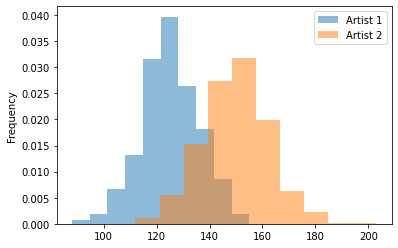

In [37]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2'] * num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It matches one or more whitespace characters.


In [38]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [39]:
# Your lyric length comparison chart here. 
lyricsdf['length'] = lyricsdf['Lyrics'].str.split().str.len()

Artist
Lil Dicky    AxesSubplot(0.125,0.125;0.775x0.755)
Lil Wayne    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

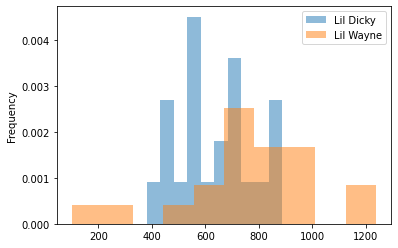

In [40]:
lyricsdf.groupby('Artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)